<a href="https://colab.research.google.com/github/JCDster/IntroToMachineLearning/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!git clone https://www.github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [51]:
#1
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
df = pd.read_csv('./assignment4/data/cars_hw.csv', low_memory=False)

In [53]:
print( df.shape, '\n')
df.head()

(976, 12) 



,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [54]:
df['Make'].unique()

array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
       'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
       'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object)

In [55]:
df['Mileage_Run'].describe()
#Min seems like an outlire but it seems valuable

count      976.000000
mean     41571.195697
std      24390.995134
min       1117.000000
25%      22676.750000
50%      37570.500000
75%      57421.250000
max      99495.000000
Name: Mileage_Run, dtype: float64

In [56]:
df['No_of_Owners'].unique()
#want to convert to numeric

array(['1st', '2nd', '3rd'], dtype=object)

In [57]:
df["No_of_Owners"] = df["No_of_Owners"].str.replace('1st','1')
df["No_of_Owners"] = df["No_of_Owners"].str.replace('2nd','2')
df["No_of_Owners"] = df["No_of_Owners"].str.replace('3rd','3')
df["No_of_Owners"] = pd.to_numeric(df["No_of_Owners"])

In [58]:
df['No_of_Owners'].unique()


array([1, 2, 3])

In [59]:
df['Seating_Capacity'].unique()

array([5, 7, 8, 6, 4])

In [60]:
df['Fuel_Type'].unique()

array(['diesel', 'petrol', 'petrol+cng'], dtype=object)

In [61]:
df['Transmission_Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [62]:
df['Price'].unique()
#WHY ARE THESE CARS SO EXPENSIVE

array([ 657000,  682000,  793000,  414000,  515000,  604000,  316000,
       1419000,  710000,  392000,  613000,  598000,  969000, 2100000,
        666000, 1039000,  858000,  860000,  680000,  625000,  567000,
        371000, 1076000,  587000,  396000,  554000,  984000,  507000,
        586000,  639000,  237000,  536000,  456000, 1107000,  571000,
        629000,  718000,  877000,  774000,  829000,  530000,  367000,
        550000,  660000,  998000, 1012000, 1537000,  908000,  508000,
        417000,  725000,  980000,  796000,  435000,  481000,  442000,
        759000,  455000, 1972000, 1138000,  920000, 1742000,  568000,
        419000,  476000,  577000,  541000,  730000, 1875000,  622000,
        937000,  609000,  412000,  638000,  807000,  590000,  651000,
        694000, 1364000,  783000,  628000,  885000,  724000,  470000,
       1085000,  620000,  659000,  953000, 1173000,  457000,  461000,
        471000,  902000,  791000,  506000,  594000,  362000,  914000,
        544000,  513

In [63]:
df['Price'].describe()
#looks expensive again, assuming price is in cents

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

In [64]:
import math

df['Price'] = df['Price'].apply(lambda x: math.log10(x))
#account for this and turn it into dollars

In [65]:
df["Unnamed: 0"].unique()
#seems to just be a ID num
df = df.rename(columns={"Unnamed: 0" : "ID_Number"})

In [66]:
df.head()

,ID_Number,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,5.817565
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,5.833784
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,5.899273
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,5.617000
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,5.711807


In [67]:
#2
df.groupby("Make")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,5.611039,0.208885,5.426511,5.458383,5.538247,5.720388,5.950365
Datsun,3.0,5.461708,0.015770,5.445604,5.454001,5.462398,5.469760,5.477121
Ford,52.0,5.849200,0.091590,5.462398,5.802774,5.849726,5.895975,6.027757
Honda,73.0,5.878748,0.146345,5.499687,5.764176,5.894870,5.961421,6.186674
Hyundai,305.0,5.805870,0.173189,5.394452,5.685742,5.804821,5.922725,6.241048
Jeep,4.0,6.174187,0.045637,6.110590,6.159716,6.184469,6.198940,6.217221
Kia,8.0,6.207014,0.033387,6.136403,6.198356,6.211760,6.231915,6.240799
MG Motors,35.0,6.270801,0.028778,6.201124,6.251992,6.266702,6.296226,6.305136
Mahindra,18.0,6.036239,0.069446,5.900913,6.015764,6.039160,6.063294,6.165838


<Axes: xlabel='Price', ylabel='Density'>

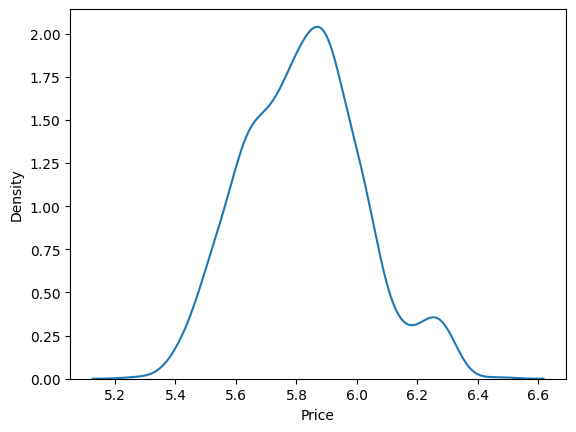

In [68]:
import seaborn as sns
sns.kdeplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

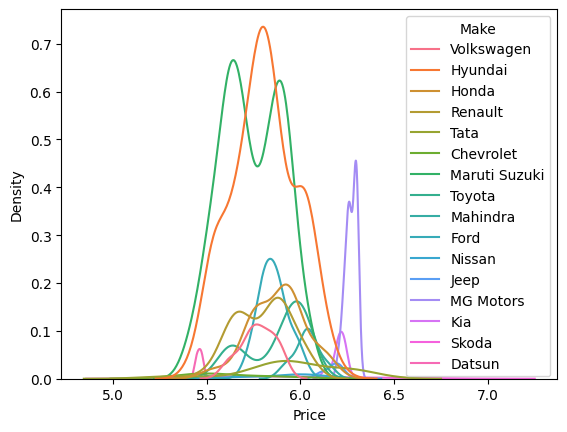

In [69]:
sns.kdeplot(data=df,x='Price',hue='Make')

In [70]:
#MG Motots is definitly the most expensive, with Datson being the cheepest.
#There seems to be a main bump at around $6000 (5.9), but a smaller second bump around $17000 (6.3)

In [71]:
#3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

vars = ["ID_Number",	"Make_Year",	"Mileage_Run", 'No_of_Owners',	'Seating_Capacity']
X = df.loc[:,vars]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [72]:
#4
#NUMERICAL ONLY
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.022455816984674644
R-squared: 0.37568790268530217


In [73]:
#COMBINED
df_encoded = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type'], drop_first=True)
vars = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type']

# Separate the features (X) and target variable (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.006850508586956064
R-squared: 0.8095435411450984


In [74]:
#CATIGORICAL ONLY
df_categorical = df.drop(["ID_Number",	"Make_Year",	"Mileage_Run", 'No_of_Owners',	'Seating_Capacity'], axis=1)
df_encoded = pd.get_dummies(df_categorical, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type'], drop_first=True)
vars = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type']

# Separate the features (X) and target variable (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.012424235964215078
R-squared: 0.654583896117187


In [75]:
#The mean sqaured error of the combined is better then any of the single Numeric and Catigorical. However the catigorical data was far superior to just the numeric in the model.

In [76]:
#5
from sklearn.preprocessing import PolynomialFeatures


count = 6
arr = [0]*count
arr2 = [0]*count
vars = ["ID_Number",	"Make_Year",	"Mileage_Run", 'No_of_Owners',	'Seating_Capacity']
X_numeric = df.loc[:,vars]
vars2 = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type']
X_catigorical = df.loc[:,vars2]

for i in range(count):
  degree = i+1

  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X_numerical_poly = poly.fit_transform(X_numeric)
  X_combined = pd.concat([pd.DataFrame(X_numerical_poly, columns=poly.get_feature_names_out(["ID_Number",	"Make_Year",	"Mileage_Run", 'No_of_Owners',	'Seating_Capacity'])), X_catigorical.reset_index(drop=True)], axis=1)

  X_encoded = pd.get_dummies(X_combined, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type'], drop_first=True)

  y = df['Price']

  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

  model = LinearRegression()

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model's performance
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  arr[i] = r2
  arr2[i] = mse

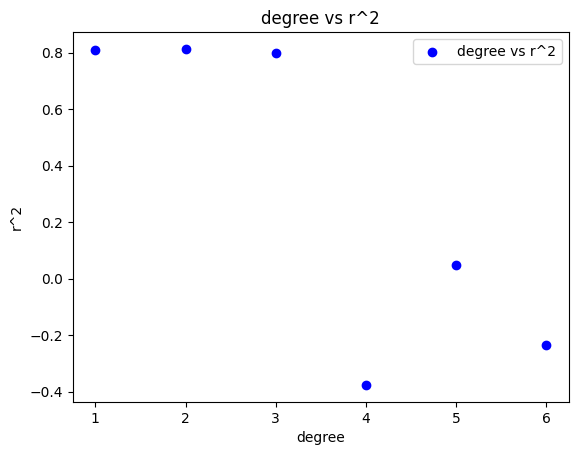

0.8095435411450954
0.8128217064827186
0.7994798723005817
0.0068505085869561685
0.006732596598411019
0.007212487646370195
0.049489706129694486


In [77]:

# Extract x and y coordinates from the subset
x = arr

y = [0]*count
for i in range(count):
  y[i] = i+1

# Create a scatter plot
plt.scatter(y, x, label='degree vs r^2', color='blue')
plt.xlabel('degree')
plt.ylabel('r^2')
plt.title('degree vs r^2')
plt.legend()
plt.show()

print(x[0])
print(x[1])
print(x[2])
print(arr2[0])
print(arr2[1])
print(arr2[2])
print(arr2[3])

In [78]:
#The best value was degree = 2, closly followed by degree = 1, it took till degree 4 to get negative. The MSE follows the r^2 value closely. It is only slightly better than 3.

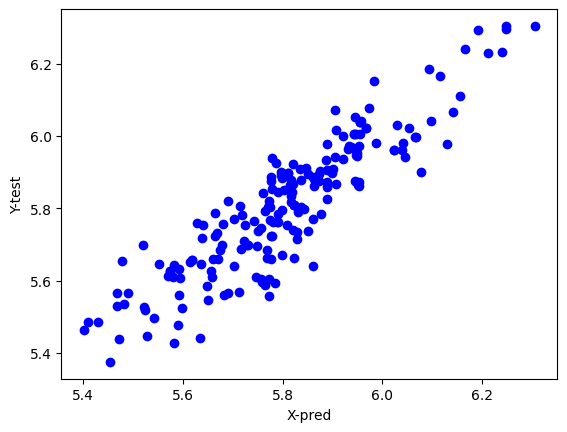

In [79]:
#6
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_numerical_poly = poly.fit_transform(X_numeric)
X_combined = pd.concat([pd.DataFrame(X_numerical_poly, columns=poly.get_feature_names_out(["ID_Number",	"Make_Year",	"Mileage_Run", 'No_of_Owners',	'Seating_Capacity'])), X_catigorical.reset_index(drop=True)], axis=1)

X_encoded = pd.get_dummies(X_combined, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type'], drop_first=True)

y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()

  # Fit the model to the training data
model.fit(X_train, y_train)

  # Make predictions on the test set
y_pred = model.predict(X_test)

plt.scatter(y_pred, y_test, label='y_predict vs y_test', color='blue')
plt.xlabel('X-pred')
plt.ylabel('Y-test')
plt.show()

In [80]:
#they roughly follow eachother, pretty darn linear

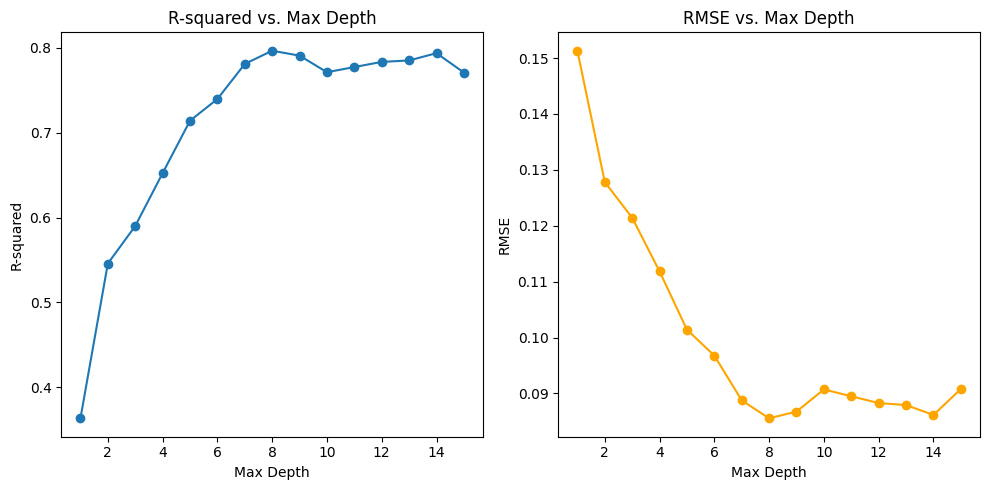

0.7809374618969227
0.7965467555968674
0.7907384026192406
0.7833556007980371


In [81]:
#7
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessor for numerical and categorical features
numeric_features = ["ID_Number",	"Make_Year",	"Mileage_Run", 'No_of_Owners',	'Seating_Capacity']
categorical_features = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission',	'Transmission_Type']



numeric_transformer = Pipeline(steps=[
    ('dummy', 'passthrough')  # Placeholder for numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Vary the maximum depth of the decision tree and compute R^2 and RMSE
max_depths = range(1, 16)
r2_scores = []
rmse_scores = []

for depth in max_depths:
    # Create a decision tree model within a pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth))
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute R^2 and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the scores
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Plot the results
plt.figure(figsize=(10, 5))

# R^2
plt.subplot(1, 2, 1)
plt.plot(max_depths, r2_scores, marker='o')
plt.title('R-squared vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')

# RMSE
plt.subplot(1, 2, 2)
plt.plot(max_depths, rmse_scores, marker='o', color='orange')
plt.title('RMSE vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

print(r2_scores[6])
print(r2_scores[7])
print(r2_scores[8])
print(r2_scores[11])

In [82]:
#It appears that a depth of 8 gives the best result

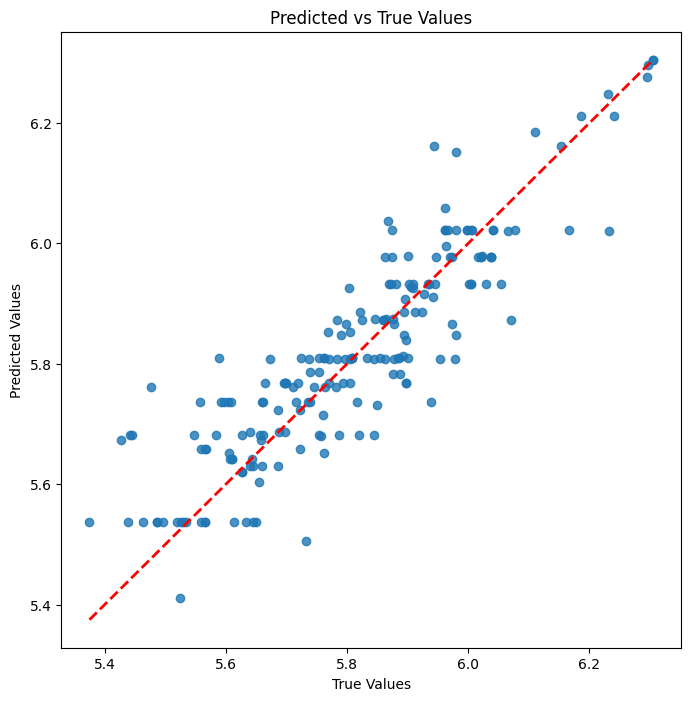

In [83]:
#8
from sklearn.tree import export_text

# Best depth (you can replace this with the optimal depth from your analysis)
best_depth = 8

# Create the decision tree model with the best depth
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=best_depth))
])

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Plot predicted vs true values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [84]:
#They roughly line up on the diagnal

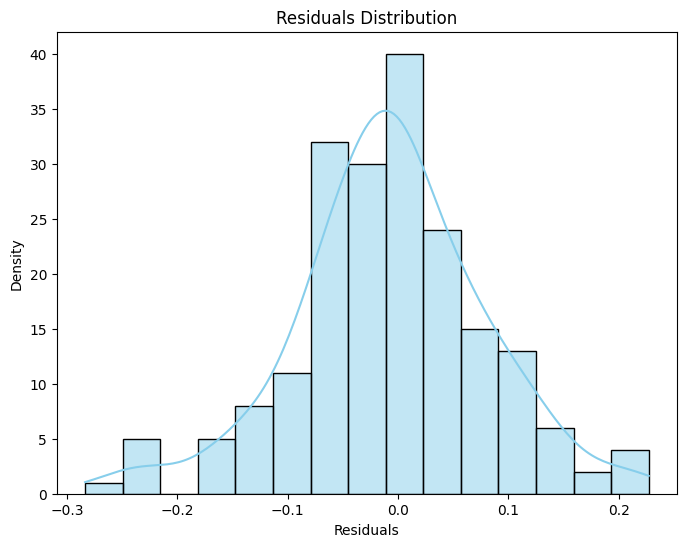

In [85]:
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [86]:
#looks mostly bell shaped with some outliers at -0.24 and 0.2

In [87]:
#9
#The linear model was better in this case as the best tree model had an r^2 of 0.7897157704835697 compared to the best linear model having an r^2 of 0.8128217064827186



**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [114]:
df = pd.read_csv('./assignment4/data/pretrial_data.csv', low_memory=False)

In [115]:
df["race"].unique()
df['Black'] = df['race'].apply(lambda x: '1' if x == 'B' else '0')


In [116]:
df['Black'] = pd.to_numeric(df['Black'])

In [117]:
#3
import statsmodels.api as sm
#found this online and wanted to try it

X = sm.add_constant(df['Black'])

# Fit logistic regression model
model = sm.Logit(df['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficient
slope_coefficient = result.params['Black']

# Calculate odds ratio
odds_ratio = np.exp(slope_coefficient)

# Interpretation of the coefficient
print(f"Slope Coefficient: {slope_coefficient}")
print(f"Odds Ratio: {odds_ratio}")

Optimization terminated successfully.
         Current function value: 0.568693
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                22986
Model:                          Logit   Df Residuals:                    22984
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.005765
Time:                        23:38:23   Log-Likelihood:                -13072.
converged:                       True   LL-Null:                       -13148.
Covariance Type:            nonrobust   LLR p-value:                 7.730e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2110      0.020    -59.575      0.000      -1.251      -1.171
Black          0.3748      0.

In [92]:
#as the coefficient is positive there is a higher chance that someone who is black is held without bail.

In [122]:
df_temp = df
df_temp['sex'] = df_temp['sex'].replace(' ', np.nan)

In [123]:
df_temp['sex_dummy'] = df_temp['sex'].apply(lambda x: '1' if x == 'F' else '0')
df_temp['sex_dummy'] = pd.to_numeric(df_temp['sex_dummy'])

In [124]:
X = sm.add_constant(df_temp[['Black', 'sex_dummy']])

# Fit logistic regression model
model = sm.Logit(df_temp['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficients
slope_black = result.params['Black']
slope_sex = result.params['sex_dummy']

# Calculate odds ratios
odds_ratio_black = np.exp(slope_black)
odds_ratio_sex = np.exp(slope_sex)

# Interpretation of the coefficients
print(f"Slope Coefficient (Black): {slope_black}")
print(f"Odds Ratio (Black): {odds_ratio_black}")

print(f"Slope Coefficient (Sex): {slope_sex}")
print(f"Odds Ratio (Sex): {odds_ratio_sex}")

Optimization terminated successfully.
         Current function value: 0.563068
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                22986
Model:                          Logit   Df Residuals:                    22983
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.01560
Time:                        23:41:18   Log-Likelihood:                -12943.
converged:                       True   LL-Null:                       -13148.
Covariance Type:            nonrobust   LLR p-value:                 8.428e-90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0576      0.022    -47.667      0.000      -1.101      -1.014
Black          0.3492      0.

In [129]:
df_temp['is_poor'] = pd.to_numeric(df_temp['is_poor'])
df_temp['is_poor'].unique()


array([nan,  0.,  1.])

In [130]:
np.random.seed(42)  # Set a seed for reproducibility
replace_probabilities = [0.49, 0.51]  # Probability of replacing with 0 and 1

df_temp['is_poor'] = df_temp['is_poor'].apply(lambda x: np.random.choice([0, 1], p=replace_probabilities) if pd.isna(x) else x)


In [131]:
X = sm.add_constant(df_temp[['Black', 'sex_dummy', 'is_poor']])

# Fit logistic regression model
model = sm.Logit(df_temp['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficients
slope_black = result.params['Black']
slope_sex = result.params['sex_dummy']
slope_is_poor = result.params['is_poor']

# Calculate odds ratios
odds_ratio_black = np.exp(slope_black)
odds_ratio_sex = np.exp(slope_sex)
odds_ratio_is_poor = np.exp(slope_is_poor)

# Interpretation of the coefficients
print(f"Slope Coefficient (Black): {slope_black}")
print(f"Odds Ratio (Black): {odds_ratio_black}")

print(f"Slope Coefficient (Sex): {slope_sex}")
print(f"Odds Ratio (Sex): {odds_ratio_sex}")

print(f"Slope Coefficient (is_poor): {slope_is_poor}")
print(f"Odds Ratio (is_poor): {odds_ratio_is_poor}")

Optimization terminated successfully.
         Current function value: 0.542336
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                22986
Model:                          Logit   Df Residuals:                    22982
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.05185
Time:                        23:46:51   Log-Likelihood:                -12466.
converged:                       True   LL-Null:                       -13148.
Covariance Type:            nonrobust   LLR p-value:                2.684e-295
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4979      0.028    -53.591      0.000      -1.553      -1.443
Black          0.2228      0.

In [135]:
df_temp['felony_dummy'] = df_temp['prior_F'].apply(lambda x: 1 if x > 0 else 0)

In [136]:
X = sm.add_constant(df_temp[['Black', 'sex_dummy', 'is_poor', 'felony_dummy']])

# Fit logistic regression model
model = sm.Logit(df_temp['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficients
slope_black = result.params['Black']
slope_sex = result.params['sex_dummy']
slope_is_poor = result.params['is_poor']
slope_prior_F = result.params['felony_dummy']

# Calculate odds ratios
odds_ratio_black = np.exp(slope_black)
odds_ratio_sex = np.exp(slope_sex)
odds_ratio_is_poor = np.exp(slope_is_poor)
odds_ratio_prior_F = np.exp(slope_prior_F)

# Interpretation of the coefficients
print(f"Slope Coefficient (Black): {slope_black}")
print(f"Odds Ratio (Black): {odds_ratio_black}")

print(f"Slope Coefficient (Sex): {slope_sex}")
print(f"Odds Ratio (Sex): {odds_ratio_sex}")

print(f"Slope Coefficient (is_poor): {slope_is_poor}")
print(f"Odds Ratio (is_poor): {odds_ratio_is_poor}")

print(f"Slope Coefficient (prior_F): {slope_prior_F}")
print(f"Odds Ratio (prior_F): {odds_ratio_prior_F}")

Optimization terminated successfully.
         Current function value: 0.509380
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                22986
Model:                          Logit   Df Residuals:                    22981
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.1095
Time:                        23:53:31   Log-Likelihood:                -11709.
converged:                       True   LL-Null:                       -13148.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8838      0.032    -59.761      0.000      -1.946      -1.822
Black            0.1186

In [137]:
df_temp['case_type_dummy'] = df_temp['case_type'].apply(lambda x: 1 if x == 'F' else 0)

In [138]:
X = sm.add_constant(df_temp[['Black', 'sex_dummy', 'is_poor', 'felony_dummy', 'case_type_dummy']])

# Fit logistic regression model
model = sm.Logit(df_temp['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficients
slope_black = result.params['Black']
slope_sex = result.params['sex_dummy']
slope_is_poor = result.params['is_poor']
slope_prior_F = result.params['felony_dummy']
slope_case_type_dummy = result.params['case_type_dummy']

# Calculate odds ratios
odds_ratio_black = np.exp(slope_black)
odds_ratio_sex = np.exp(slope_sex)
odds_ratio_is_poor = np.exp(slope_is_poor)
odds_ratio_prior_F = np.exp(slope_prior_F)
odds_ratio_case_type_dummy = np.exp(slope_case_type_dummy)


# Interpretation of the coefficients
print(f"Slope Coefficient (Black): {slope_black}")
print(f"Odds Ratio (Black): {odds_ratio_black}")

print(f"Slope Coefficient (Sex): {slope_sex}")
print(f"Odds Ratio (Sex): {odds_ratio_sex}")

print(f"Slope Coefficient (is_poor): {slope_is_poor}")
print(f"Odds Ratio (is_poor): {odds_ratio_is_poor}")

print(f"Slope Coefficient (prior_F): {slope_case_type_dummy}")
print(f"Odds Ratio (prior_F): {odds_ratio_case_type_dummy}")

Optimization terminated successfully.
         Current function value: 0.445199
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                22986
Model:                          Logit   Df Residuals:                    22980
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.2217
Time:                        23:54:44   Log-Likelihood:                -10233.
converged:                       True   LL-Null:                       -13148.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4027      0.037    -65.512      0.000      -2.475      -2.331
Black         

In [ ]:
#every time another variable is added the coefficient for Black decreases

In [139]:
#5
df_sex_F = df_temp[df_temp['sex_dummy'] == 1]
df_sex_M = df_temp[df_temp['sex_dummy'] == 0]

In [140]:
X = sm.add_constant(df_sex_F['Black'])

# Fit logistic regression model
model = sm.Logit(df_sex_F['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficient
slope_coefficient = result.params['Black']

# Calculate odds ratio
odds_ratio = np.exp(slope_coefficient)

# Interpretation of the coefficient
print(f"Slope Coefficient: {slope_coefficient}")
print(f"Odds Ratio: {odds_ratio}")

Optimization terminated successfully.
         Current function value: 0.475622
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                 6396
Model:                          Logit   Df Residuals:                     6394
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:               0.0003795
Time:                        23:59:12   Log-Likelihood:                -3042.1
converged:                       True   LL-Null:                       -3043.2
Covariance Type:            nonrobust   LLR p-value:                    0.1285
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4606      0.040    -36.631      0.000      -1.539      -1.382
Black         -0.1033      0.

In [141]:
X = sm.add_constant(df_sex_M['Black'])

# Fit logistic regression model
model = sm.Logit(df_sex_M['held_wo_bail'], X)
result = model.fit()

# Display model summary
print(result.summary())

# Accessing the slope coefficient
slope_coefficient = result.params['Black']

# Calculate odds ratio
odds_ratio = np.exp(slope_coefficient)

# Interpretation of the coefficient
print(f"Slope Coefficient: {slope_coefficient}")
print(f"Odds Ratio: {odds_ratio}")

Optimization terminated successfully.
         Current function value: 0.595052
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           held_wo_bail   No. Observations:                16590
Model:                          Logit   Df Residuals:                    16588
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.009284
Time:                        23:59:28   Log-Likelihood:                -9871.9
converged:                       True   LL-Null:                       -9964.4
Covariance Type:            nonrobust   LLR p-value:                 3.890e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1136      0.024    -46.996      0.000      -1.160      -1.067
Black          0.4696      0.

In [ ]:
#clearly there is a big difference between how black men and black women are treated based on women having a negitive coefficient and men having a large positive coeffient

In [ ]:
#7


simply put corilation does not equal causation. Just because there is a trend does not meen that it is because an individual is a black make that he is held without bond. There can be many other confounding reasons/variables. For example; the socio-economic situation many minority groups are subjected to in America can lead to higher crime rate. Data is very good at showing trends but not the root causes, this is why, as a society, we should ask why this is happening and not simply changing the way we issue bonds. This data clearly shows a problem, but it could be anywhere and anything, not neciserily racist judges issuing biassed opinions.

Ok why was that actually fun, DATA IS FUN

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?